<a href="https://colab.research.google.com/github/alijablack/data-science/blob/main/Predicting_Box_Office_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Key Film Features in Box Office Success

## Problem Statement

Predict box office success using IMDB movie dataset to identify key features of profitable films. This is a regression problem using XGBoost and Random Forest to model the logic behind what features contribute to a successful or unsuccessful film, as defined by the overall profit for the film.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import graphviz
import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Collection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
movie_path = '/content/drive/My Drive/Copy of Project_3_Movie_Data.csv'

In [ ]:
movies = pd.read_csv(movie_path)

In [ ]:
#train = pd.read_csv(movie_path)

In [ ]:
#test = pd.read_csv(movie_path)

## Data Cleaning

The dataset retrieved from IMDB includes a variety of numerical, categorical, and list data in json formats.

In [ ]:
movies_copy = movies.copy()

In [ ]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4322 non-null   int64  
 1   genres                4322 non-null   object 
 2   homepage              1553 non-null   object 
 3   id                    4322 non-null   int64  
 4   keywords              4322 non-null   object 
 5   original_language     4322 non-null   object 
 6   original_title        4322 non-null   object 
 7   overview              4319 non-null   object 
 8   popularity            4322 non-null   float64
 9   production_companies  4322 non-null   object 
 10  production_countries  4322 non-null   object 
 11  release_date          4322 non-null   object 
 12  runtime               4320 non-null   float64
 13  spoken_languages      4322 non-null   object 
 14  status                4322 non-null   object 
 15  tagline              

In [ ]:
#.T transposes
movies_copy.head(50).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
budget,0,1500000,25000000,62000,140000000,70000000,10500000,23000000,1000000,650000,10000000,35866397,0,0,5000000,70000000,0,12000000,0,0,155000000,0,0,42000000,20000000,18000000,0,10,5500000,0,35000000,180000000,24000000,38000000,35000000,0,0,80000000,0,10000000,0,10000000,20000000,2000000,2000000,13000000,22500000,0,1500000,150000000
genres,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 27, ""name"": ""Horror""}, {""id"": 878, ""na...","[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...","[{""id"": 27, ""name"": ""Horror""}, {""id"": 28, ""nam...","[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...","[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 878, ""name"": ""Science Fiction""}]","[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 27, ""name"": ""Horror""}]","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...","[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...","[{""id"": 27, ""name"": ""Horror""}, {""id"": 878, ""na...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",[],"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10751, ""n...","[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...","[{""id"": 35, ""name"": ""Comedy""}]","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...","[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...","[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10752, ""n...","[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 80, ""nam...","[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 27, ""name"": ""Horror""}]","[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...","[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""..."
homepage,NaN,http://www.dhentertainment.com/projects/1.my-n...,http://whatjusthappenedfilm.com/,NaN,NaN,NaN,NaN,NaN,http://www.courageousthemovie.com,http://www.thelegodocumentary.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.thechristmascandlemovie.com/,NaN,http://www.myallamerican.com/,NaN,NaN,NaN,http://www.mgm.com/view/movie/2009/Thunderball/,NaN,NaN,http://www.pacificrimmovie.com/,NaN,http://waterforelephantsfilm.com/,http://www.nannymcphee.co.uk/,http://housefull.erosentertainment.com/,http://www.foxsearchlight.com/underthesamemoon,NaN,NaN,http://www.ouridiotbrother.com/,NaN,http://www.sarahskey.com.au/,http://www.sonypictures.com/movies/reignoverme...,NaN,http://www.sonyclassics.com/insidejob/,NaN,http://www.thewaterdiviner.com/,http://www.indiegameth

Check for NA values in dataset

In [ ]:
movies_copy.isna().sum()

budget                     0
genres                     0
homepage                2769
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
runtime                    2
spoken_languages           0
status                     0
tagline                  761
title                      0
vote_average               0
vote_count                 0
movie_id                   0
title.1                    0
cast                       0
crew                       0
revenue                    0
dtype: int64

Consider dropping homepage, tagline, id, runtime, and overview due to null values and data intuition these features are of low significance to box office revenue. All dropped features will be noted in the 'Dropped Columns' subsection of notebook.

In [ ]:
movies_copy.isna().sum()

budget                     0
genres                     0
homepage                2769
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
runtime                    2
spoken_languages           0
status                     0
tagline                  761
title                      0
vote_average               0
vote_count                 0
movie_id                   0
title.1                    0
cast                       0
crew                       0
revenue                    0
dtype: int64

In [ ]:
movies_copy.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'vote_average', 'vote_count', 'movie_id',
       'title.1', 'cast', 'crew', 'revenue'],
      dtype='object')

In [ ]:
nan_values = movies_copy.isna()

In [ ]:
nan_columns = nan_values.any()

In [ ]:
nan_columns

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date            False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
movie_id                False
title.1                 False
cast                    False
crew                    False
revenue                 False
dtype: bool

### Movie Titles

In [ ]:
title_1 = movies['title.1'].iloc[1]

In [ ]:
print(title_1)

My Name Is Bruce


Check for duplicate titles

In [ ]:
print('duplicate_titles',':', movies_copy.duplicated('title').any().sum())

duplicate_titles : 1


Remove title.1 and original title columns; keep the title

In [ ]:
#movies_copy.drop('title.1', axis = 1, inplace= True)

In [ ]:
movies_copy = movies_copy.drop_duplicates('original_title')
print('number of duplicates titles', ':')

number of duplicates titles :


Try to lowercase the titles

### Budget and Revenue

The dataset had a few outliers and 0's for budget; designate a minimum for the budget and revenue.

In [ ]:
print('budget min', ':', movies_copy['budget'].min())
print('revenue min', ':', movies_copy['revenue'].min())
print(movies_copy['budget'].head(10).sort_values(ascending=True))
print(movies_copy['revenue'].head(10).sort_values(ascending=True))

budget min : 0
revenue min : 0
0            0
3        62000
9       650000
8      1000000
1      1500000
6     10500000
7     23000000
2     25000000
5     70000000
4    140000000
Name: budget, dtype: int64
0            0
3            0
9            0
1       173066
2      6673422
8     34522221
6     68700000
7    150816700
5    215529201
4    553799566
Name: revenue, dtype: int64


Designated a minimum of $100,000 for budget and revenue

In [ ]:
movies_copy = movies_copy[movies_copy['budget']>=100000]

In [ ]:
movies_copy = movies_copy[movies_copy['revenue']>=100000]

In [ ]:
print('budget min', ':', movies_copy['budget'])

budget min : 1         1500000
2        25000000
4       140000000
5        70000000
6        10500000
          ...    
4316      6000000
4318     80000000
4319     10000000
4320      4000000
4321     55000000
Name: budget, Length: 2847, dtype: int64


Log scale of Budget vs Revenue plot shows as budget increases, revenue increases. There appear to be a few outliers to identify and remove.

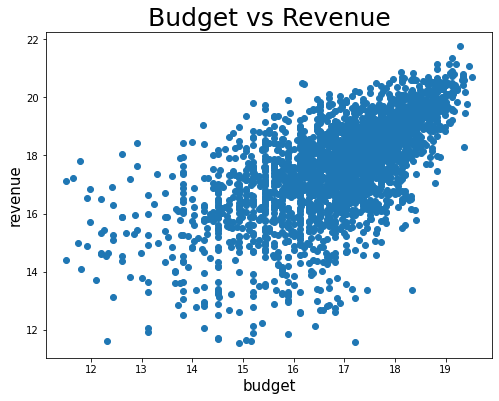

In [ ]:
plt.figure(figsize=[8,6])
plt.scatter(np.log(movies_copy['budget']), np.log(movies_copy['revenue']))
plt.xlabel('budget', size=15)
plt.ylabel('revenue', size=15)
plt.title('Budget vs Revenue', size=25)
plt.show()

### Genres

Let's look into movie genres, a feature that may have a high correlation with revenue.

In [ ]:
genre_1 = movies_copy[['genres']]

In [ ]:
genre_1

,genres
1,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam..."
2,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam..."
5,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 28, ""nam..."
6,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""..."
...,...
4316,"[{""id"": 10749, ""name"": ""Romance""}]"
4318,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""..."
4319,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4320,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 80, ""nam..."


Translate the genres category from a float

In [ ]:
movies_copy['genres']

1       [{"id": 35, "name": "Comedy"}, {"id": 27, "nam...
2       [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 53, "nam...
5       [{"id": 27, "name": "Horror"}, {"id": 28, "nam...
6       [{"id": 878, "name": "Science Fiction"}, {"id"...
                              ...                        
4316                   [{"id": 10749, "name": "Romance"}]
4318    [{"id": 878, "name": "Science Fiction"}, {"id"...
4319    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4320    [{"id": 35, "name": "Comedy"}, {"id": 80, "nam...
4321    [{"id": 18, "name": "Drama"}, {"id": 10749, "n...
Name: genres, Length: 2847, dtype: object

Pre-process genres by defining a function 

In [ ]:
def genres_preprocessing(elem):
    if pd.isnull(elem):   
      str1 = ' '
    else:
      str1 = elem.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace('name', '').replace('id', '').replace(':', '').replace('"','')
      ll = str1.split(',')[1::2]
      str1 = ''
      for ele in ll:
       str1 += ele
       str1 += '|'
    return str1[:-1]

In [ ]:
movies_copy["genres_processed"] = movies_copy.genres.apply(lambda elem: genres_preprocessing(elem))

In [ ]:
movies_copy['genres_processed']

1                                  Comedy|Horror
2                                   Comedy|Drama
4       Action|Thriller|ScienceFiction|Adventure
5                Horror|Action|Drama|Fantasy|War
6               ScienceFiction|Mystery|Adventure
                          ...                   
4316                                     Romance
4318             ScienceFiction|Adventure|Action
4319                                Comedy|Drama
4320               Comedy|Crime|Thriller|Romance
4321                               Drama|Romance
Name: genres_processed, Length: 2847, dtype: object

In [ ]:
movies_copy.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'vote_average', 'vote_count', 'movie_id',
       'title.1', 'cast', 'crew', 'revenue', 'genres_processed'],
      dtype='object')

Remove genres since we have genres_processed

Create a ranking system for genres.

In [ ]:
def create_ranking_dict(df_column, field):
  # convert the df_column to a list
  all_entries = df_column.tolist()
  # make an empty dictionary for our rankings
  ranks = {}
  for entry in all_entries:
    # this will create a list of dictionaries
    list_dict = json.loads(entry)
    # for each entry pull out the values for field
    values = [element[field] for element in list_dict]
  # for each value in the list of values add to the ranking for that value
    for value in values:
      if value in ranks.keys():
        ranks[value] += 1
      else: ranks[value] = 1
  return ranks

In [ ]:
genres_processed_ranks = create_ranking_dict(movies['genres'], 'name')

In [ ]:
def rank(json_list, field, ranking_dict, top_n):
  #turn the json style data into a dictionary
  list_dict = json.loads(json_list)
  #create a list of all field values in the json_list
  values = [element[field] for element in list_dict]
  #get the ranks for all of the actors
  rankings = [ranking_dict[value] for value in values]
  # sort them so we can get the top three
  rankings.sort()
  # sum the top_n
  rank = sum(rankings[-top_n:])
  return rank

In [ ]:
movies_copy['genres_processed_ranks']= movies['genres'].apply(lambda x: rank(x, 'name', genres_processed_ranks, 1))

In [ ]:
genres_processed_ranks

{'Action': 1013,
 'Adventure': 716,
 'Animation': 210,
 'Comedy': 1567,
 'Crime': 606,
 'Documentary': 100,
 'Drama': 2061,
 'Family': 465,
 'Fantasy': 381,
 'Foreign': 29,
 'History': 180,
 'Horror': 472,
 'Music': 166,
 'Mystery': 315,
 'Romance': 811,
 'Science Fiction': 484,
 'TV Movie': 7,
 'Thriller': 1137,
 'War': 132,
 'Western': 66}

### Production Companies

In [ ]:
movies_copy['production_companies']

1       [{"name": "Dark Horse Entertainment", "id": 55...
2       [{"name": "2929 Productions", "id": 846}, {"na...
4       [{"name": "Jerry Bruckheimer Films", "id": 130...
5       [{"name": "Universal Pictures", "id": 33}, {"n...
6       [{"name": "Stanley Kubrick Productions", "id":...
                              ...                        
4316    [{"name": "Paramount Pictures", "id": 4}, {"na...
4318    [{"name": "DreamWorks SKG", "id": 27}, {"name"...
4319    [{"name": "Echo Lake Productions", "id": 2147}...
4320    [{"name": "Echo Lake Productions", "id": 2147}...
4321    [{"name": "Bedford Falls Productions", "id": 3...
Name: production_companies, Length: 2847, dtype: object

Make a general function to start ranking production companies

In [ ]:
def create_ranking_dict(df_column, field):
  # convert the df_column to a list
  all_entries = df_column.tolist()
  # make an empty dictionary for our rankings
  ranks = {}
  for entry in all_entries:
    # this will create a list of dictionaries
    list_dict = json.loads(entry)
    # for each entry pull out the values for field
    values = [element[field] for element in list_dict]
  # for each value in the list of values add to the ranking for that value
    for value in values:
      if value in ranks.keys():
        ranks[value] += 1
      else: ranks[value] = 1
  return ranks

Test function on production companies

In [ ]:
prod_companies_ranks = create_ranking_dict(movies_copy['production_companies'], 'name')

In [ ]:
prod_companies_ranks.keys()

dict_keys(['Dark Horse Entertainment', 'Image Entertainment', '2929 Productions', 'Linson Entertainment', 'Art Linson Productions', 'Tribeca Productions', 'Jerry Bruckheimer Films', 'Touchstone Pictures', 'Valhalla Motion Pictures', 'Universal Pictures', 'Legendary Pictures', 'Fuji Television Network', 'Dentsu', 'Michael De Luca Productions', 'Stanley Kubrick Productions', 'Metro-Goldwyn-Mayer (MGM)', 'Summit Entertainment', 'Offspring Entertainment', 'TriStar Pictures', 'Provident Films', 'Affirm Films', 'Sherwood Pictures', 'Alabama Production Group', 'Rogue Pictures', 'Relativity Media', 'Hydraulx', 'Rat Entertainment', 'Transmission Pictures', 'Bac Films', 'Pandora Filmproduktion', 'Procirep', 'Galatée Films', 'Eurimages', 'Canal+', 'Westdeutscher Rundfunk (WDR)', 'Télévision Suisse-Romande (TSR)', 'Wanda Visión S.A.', 'Conseil Régional de Franche-Comté', 'Eyescreen S.r.l.', 'France 2 Cinéma', 'Les Productions de la Guéville', 'Centre National de la Cinématographie (CNC)', 'Paramou

In [ ]:
def rank(json_list, field, ranking_dict, top_n):
  #turn the json style data into a dictionary
  list_dict = json.loads(json_list)
  #create a list of all field values in the json_list
  values = [element[field] for element in list_dict]
  #get the ranks for all of the actors
  rankings = [ranking_dict[value] for value in values]
  # sort them so we can get the top three
  rankings.sort()
  # sum the top_n
  rank = sum(rankings[-top_n:])
  return rank

In [ ]:
movies_copy['prod_companies_ranks']= movies_copy['production_companies'].apply(lambda x: rank(x, 'name', prod_companies_ranks, 1))

In [ ]:
prod_companies_ranks

{'Dark Horse Entertainment': 9,
 'Image Entertainment': 2,
 '2929 Productions': 7,
 'Linson Entertainment': 3,
 'Art Linson Productions': 3,
 'Tribeca Productions': 10,
 'Jerry Bruckheimer Films': 15,
 'Touchstone Pictures': 86,
 'Valhalla Motion Pictures': 7,
 'Universal Pictures': 250,
 'Legendary Pictures': 31,
 'Fuji Television Network': 6,
 'Dentsu': 12,
 'Michael De Luca Productions': 8,
 'Stanley Kubrick Productions': 3,
 'Metro-Goldwyn-Mayer (MGM)': 77,
 'Summit Entertainment': 41,
 'Offspring Entertainment': 6,
 'TriStar Pictures': 45,
 'Provident Films': 3,
 'Affirm Films': 5,
 'Sherwood Pictures': 1,
 'Alabama Production Group': 1,
 'Rogue Pictures': 7,
 'Relativity Media': 96,
 'Hydraulx': 2,
 'Rat Entertainment': 4,
 'Transmission Pictures': 1,
 'Bac Films': 3,
 'Pandora Filmproduktion': 2,
 'Procirep': 1,
 'Galatée Films': 1,
 'Eurimages': 6,
 'Canal+': 37,
 'Westdeutscher Rundfunk (WDR)': 7,
 'Télévision Suisse-Romande (TSR)': 1,
 'Wanda Visión S.A.': 1,
 'Conseil Région

In [ ]:
movies_copy.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'vote_average', 'vote_count', 'movie_id',
       'title.1', 'cast', 'crew', 'revenue', 'genres_processed',
       'genres_processed_ranks', 'prod_companies_ranks'],
      dtype='object')

### Crew

Review the crew feature

In [ ]:
movies_copy['crew'].T

1       [{"credit_id": "52fe4326c3a36847f803e1bf", "de...
2       [{"credit_id": "56fa7d06c3a3681937002bd9", "de...
4       [{"credit_id": "5491a0a4c3a368466b001ce7", "de...
5       [{"credit_id": "545e6edf0e0a261fb300708a", "de...
6       [{"credit_id": "52fe4212c3a36847f8001a05", "de...
                              ...                        
4316    [{"credit_id": "53807b97c3a36805a1004d86", "de...
4318    [{"credit_id": "52fe4339c3a36847f8043c15", "de...
4319    [{"credit_id": "52fe45cdc3a36847f80db247", "de...
4320    [{"credit_id": "52fe4494c3a36847f809e0c7", "de...
4321    [{"credit_id": "58eb3efcc3a3684aa4072ff0", "de...
Name: crew, Length: 2847, dtype: object

In [ ]:
movies_copy['crew'].all()

'[{"credit_id": "58eb3efcc3a3684aa4072ff0", "department": "Production", "gender": 0, "id": 561, "job": "Casting", "name": "John Papsidera"}, {"credit_id": "58eb40b6925141351f0488a7", "department": "Visual Effects", "gender": 2, "id": 10631, "job": "Special Effects Supervisor", "name": "John Frazier"}, {"credit_id": "58eb3e7a9251414b28042111", "department": "Camera", "gender": 2, "id": 11699, "job": "Director of Photography", "name": "Bojan Bazelli"}, {"credit_id": "58eb3f419251412819084ac3", "department": "Art", "gender": 2, "id": 11877, "job": "Production Design", "name": "Jon Gary Steele"}, {"credit_id": "58eb3ea492514134eb04b162", "department": "Editing", "gender": 1, "id": 15560, "job": "Editor", "name": "Virginia Katz"}, {"credit_id": "58eb4327c3a368730207d2f8", "department": "Sound", "gender": 0, "id": 21141, "job": "Supervising Music Editor", "name": "Todd Bozung"}, {"credit_id": "58eb3e4492514134eb04b116", "department": "Sound", "gender": 2, "id": 23486, "job": "Original Music 

In [ ]:
def create_rankings(df_column, field):
  """Create a ranking dictionary that counts how many times an element shows up"""
  ranks = {}
  column_list = df_column.tolist()
  for item in column_list: 
    list_dict = json.loads(item)
    values = [element[field] for element in list_dict]
    for value in values:
      if value in ranks.keys():
        ranks[value] += 1
      else: ranks[value] = 1
  return ranks

In [ ]:
crew_ranks = create_rankings(movies_copy['crew'], 'name')
print(crew_ranks)

{'Bruce Campbell': 4, 'Mark Verheiden': 2, 'Robert De Niro': 10, 'Art Linson': 10, 'Jane Rosenthal': 11, 'Barry Levinson': 20, 'Mark Allan': 3, 'Bill Corso': 38, 'Stéphane Fontaine': 1, 'Mark Cuban': 6, 'Todd Wagner': 6, 'Eric Kopeloff': 3, 'Marcelo Zarvos': 6, 'Crys Forsyth-Smith': 3, 'Jerry Bruckheimer': 22, 'Fred C. Blau Jr.': 4, 'Doug J. Meerdink': 11, 'Chris Lebenzon': 28, 'Michael Kaplan': 11, 'Bonnie Timmermann': 22, 'Michael Bay': 30, 'Gale Anne Hurd': 17, 'Robert Roy Pool': 2, 'Jonathan Hensleigh': 6, 'John Schwartzman': 11, 'Trevor Rabin': 24, 'Michael White': 7, 'Mark Goldblatt': 21, 'Glen Scantlebury': 8, 'Christopher Boyes': 31, 'Lawrence A. Hubbs': 6, 'Bruton Jones': 5, 'Rick Simpson': 7, 'Magali Guidasci': 2, 'David Farmer': 6, 'Shane Salerno': 5, 'Kevin Ishioka': 12, 'Steve Boeddeker': 26, 'Kenny Bates': 13, 'Mike Higelmire': 2, 'Rick Stratton': 1, 'Tom Myers': 15, 'J.J. Abrams': 16, 'Greg P. Russell': 18, 'Tony Gilroy': 13, 'Mitchell Amundsen': 11, 'Larry Blanford': 10

### Cast

Consider how to create actor rankings from the cast column. Assign a ranking to each actor, take the top 3 actors and add their rankings, have a numerical ranking for each movie.

In [ ]:
movies_copy['cast']

1       [{"cast_id": 2, "character": "Bruce Campbell",...
2       [{"cast_id": 2, "character": "Himself", "credi...
4       [{"cast_id": 7, "character": "Harry S. Stamper...
5       [{"cast_id": 6, "character": "Dracula / Vlad T...
6       [{"cast_id": 6, "character": "Dr. Dave Bowman"...
                              ...                        
4316    [{"cast_id": 17, "character": "Danny Zuko", "c...
4318    [{"cast_id": 17, "character": "Alexander Hartd...
4319    [{"cast_id": 4, "character": "Steve Jones", "c...
4320    [{"cast_id": 2, "character": "Frank Falenczyk"...
4321    [{"cast_id": 1, "character": "Tess", "credit_i...
Name: cast, Length: 2847, dtype: object

In [ ]:
all_cast = movies_copy['cast'].tolist()

In [ ]:
all_cast[0]

'[{"cast_id": 2, "character": "Bruce Campbell", "credit_id": "52fe4326c3a36847f803e1c3", "gender": 2, "id": 11357, "name": "Bruce Campbell", "order": 0}, {"cast_id": 10, "character": "Kelly Graham", "credit_id": "52fe4326c3a36847f803e1e7", "gender": 0, "id": 112543, "name": "Grace Thorsen", "order": 1}, {"cast_id": 7, "character": "Wing", "credit_id": "52fe4326c3a36847f803e1d9", "gender": 2, "id": 11769, "name": "Ted Raimi", "order": 2}, {"cast_id": 4, "character": "Tiny", "credit_id": "52fe4326c3a36847f803e1cd", "gender": 0, "id": 20250, "name": "Adam Boyd", "order": 3}, {"cast_id": 5, "character": "Fan", "credit_id": "52fe4326c3a36847f803e1d1", "gender": 0, "id": 20251, "name": "Mike Estes", "order": 4}, {"cast_id": 6, "character": "Kasey", "credit_id": "52fe4326c3a36847f803e1d5", "gender": 1, "id": 20252, "name": "Janelle Farber", "order": 5}, {"cast_id": 8, "character": "Gold Lick Citizen", "credit_id": "52fe4326c3a36847f803e1dd", "gender": 0, "id": 20253, "name": "Dani Kelly", "or

In [ ]:
cast_ranks = {}
for cast in all_cast:
  list_dict = json.loads(cast)
  names = [element['name'] for element in list_dict]
  for name in names:
    if name in cast_ranks.keys():
      cast_ranks[name] += 1
    else: cast_ranks[name] = 1

This gives us a dictionary with the total number of movies eact actor is in.

In [ ]:
cast_ranks

{'Bruce Campbell': 16,
 'Grace Thorsen': 1,
 'Ted Raimi': 9,
 'Adam Boyd': 1,
 'Mike Estes': 2,
 'Janelle Farber': 1,
 'Dani Kelly': 1,
 'Bruce Willis': 36,
 'Robert De Niro': 43,
 'Sean Penn': 18,
 'Robin Wright': 14,
 'Stanley Tucci': 29,
 'John Turturro': 20,
 'Kristen Stewart': 17,
 'Lily Rabe': 2,
 'Marin Hinkle': 5,
 'Catherine Keener': 20,
 'Michael Wincott': 9,
 'Jason Kravits': 5,
 'Mark Ivanir': 5,
 'Remy K. Selma': 2,
 'Christopher Evan Welch': 5,
 'Sam Levinson': 1,
 'Billy Bob Thornton': 16,
 'Ben Affleck': 27,
 'Liv Tyler': 9,
 'Will Patton': 13,
 'Steve Buscemi': 29,
 'William Fichtner': 18,
 'Michael Clarke Duncan': 17,
 'Peter Stormare': 15,
 'Owen Wilson': 34,
 'Ken Hudson Campbell': 6,
 'Jessica Steen': 1,
 'Chris Ellis': 11,
 'Keith David': 24,
 'Jason Isaacs': 18,
 'Marshall R. Teague': 2,
 'J. Patrick McCormack': 2,
 'Ian Quinn': 2,
 'Charlton Heston': 12,
 'Eddie Griffin': 5,
 'Sage Allen': 2,
 'Grace Zabriskie': 5,
 'Grayson McCouch': 1,
 'Clark Heathcliffe Brol

Create a top 3 ranking for each film 

In [ ]:
#json_list will be our input from cast field in df
# ranking_dict will be the dictionary of cast ranks
def actor_ranking(json_list, ranking_dict):
  list_dict = json.loads(json_list)
  names = [element['name'] for element in list_dict]
  rankings = [ranking_dict[name] for name in names]
  rankings.sort()
  rank = sum(rankings[-3:])
  return rank

In [ ]:
movies_copy['cast'].iloc[0]

'[{"cast_id": 2, "character": "Bruce Campbell", "credit_id": "52fe4326c3a36847f803e1c3", "gender": 2, "id": 11357, "name": "Bruce Campbell", "order": 0}, {"cast_id": 10, "character": "Kelly Graham", "credit_id": "52fe4326c3a36847f803e1e7", "gender": 0, "id": 112543, "name": "Grace Thorsen", "order": 1}, {"cast_id": 7, "character": "Wing", "credit_id": "52fe4326c3a36847f803e1d9", "gender": 2, "id": 11769, "name": "Ted Raimi", "order": 2}, {"cast_id": 4, "character": "Tiny", "credit_id": "52fe4326c3a36847f803e1cd", "gender": 0, "id": 20250, "name": "Adam Boyd", "order": 3}, {"cast_id": 5, "character": "Fan", "credit_id": "52fe4326c3a36847f803e1d1", "gender": 0, "id": 20251, "name": "Mike Estes", "order": 4}, {"cast_id": 6, "character": "Kasey", "credit_id": "52fe4326c3a36847f803e1d5", "gender": 1, "id": 20252, "name": "Janelle Farber", "order": 5}, {"cast_id": 8, "character": "Gold Lick Citizen", "credit_id": "52fe4326c3a36847f803e1dd", "gender": 0, "id": 20253, "name": "Dani Kelly", "or

In [ ]:
actor_ranking(movies_copy['cast'].iloc[0], cast_ranks)

27

In [ ]:
movies_copy['cast_ranks'] = movies_copy['cast'].apply(lambda x: actor_ranking(x, cast_ranks))

In [ ]:
cast_ranks

{'Bruce Campbell': 16,
 'Grace Thorsen': 1,
 'Ted Raimi': 9,
 'Adam Boyd': 1,
 'Mike Estes': 2,
 'Janelle Farber': 1,
 'Dani Kelly': 1,
 'Bruce Willis': 36,
 'Robert De Niro': 43,
 'Sean Penn': 18,
 'Robin Wright': 14,
 'Stanley Tucci': 29,
 'John Turturro': 20,
 'Kristen Stewart': 17,
 'Lily Rabe': 2,
 'Marin Hinkle': 5,
 'Catherine Keener': 20,
 'Michael Wincott': 9,
 'Jason Kravits': 5,
 'Mark Ivanir': 5,
 'Remy K. Selma': 2,
 'Christopher Evan Welch': 5,
 'Sam Levinson': 1,
 'Billy Bob Thornton': 16,
 'Ben Affleck': 27,
 'Liv Tyler': 9,
 'Will Patton': 13,
 'Steve Buscemi': 29,
 'William Fichtner': 18,
 'Michael Clarke Duncan': 17,
 'Peter Stormare': 15,
 'Owen Wilson': 34,
 'Ken Hudson Campbell': 6,
 'Jessica Steen': 1,
 'Chris Ellis': 11,
 'Keith David': 24,
 'Jason Isaacs': 18,
 'Marshall R. Teague': 2,
 'J. Patrick McCormack': 2,
 'Ian Quinn': 2,
 'Charlton Heston': 12,
 'Eddie Griffin': 5,
 'Sage Allen': 2,
 'Grace Zabriskie': 5,
 'Grayson McCouch': 1,
 'Clark Heathcliffe Brol

Create a cast vs. revenue scatter plot. This plot shows cast rank may not be directly correlated with revenue.

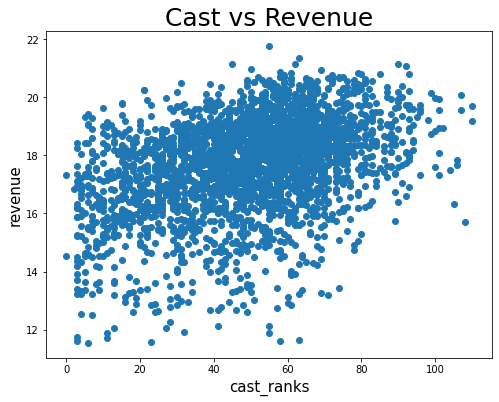

In [ ]:
plt.figure(figsize=[8,6])
plt.scatter((movies_copy['cast_ranks']), np.log(movies_copy['revenue']))
plt.xlabel('cast_ranks', size=15)
plt.ylabel('revenue', size=15)
plt.title('Cast vs Revenue', size=25)
plt.show()

### Directors

Make a ranking dictionary for directors

In [ ]:
crews = movies_copy['crew'].tolist()

director_ranks = {}
for crew in crews:
  list_dict = json.loads(crew)
  names = [element['name'] for element in list_dict if element['job'] == 'Director']
  for name in names:
    if name in director_ranks.keys():
      director_ranks[name] += 1
    else: director_ranks[name] = 1

In [ ]:
director_ranks

{'Bruce Campbell': 1,
 'Barry Levinson': 8,
 'Michael Bay': 12,
 'Gary Shore': 1,
 'Stanley Kubrick': 6,
 'Jon M. Chu': 5,
 'Alex Kendrick': 1,
 'Colin Strause': 2,
 'Greg Strause': 2,
 'Jacques Perrin': 1,
 'Rob Hedden': 1,
 'Steve Carr': 5,
 'Anne Fletcher': 4,
 'Michael Apted': 5,
 'Andrew Niccol': 4,
 'Miloš Forman': 3,
 'Terence Young': 4,
 'Colin Higgins': 1,
 'Guillermo del Toro': 4,
 'Wes Craven': 10,
 'Francis Lawrence': 5,
 'Susanna White': 1,
 'Adam Shankman': 7,
 'Jesse Peretz': 1,
 'Gilles Paquet-Brenner': 1,
 'Mike Binder': 2,
 'Charles Ferguson': 2,
 'Russell Crowe': 1,
 'Henry Bean': 1,
 'Eric Darnell': 4,
 'Tom McGrath': 4,
 'J.C. Chandor': 3,
 'Christopher McQuarrie': 3,
 'Richard Donner': 10,
 'Matthew Vaughn': 4,
 'Steven Shainberg': 2,
 'Rob Cohen': 8,
 'Bryan Singer': 8,
 'Roger Kumble': 1,
 'Jason Zada': 1,
 'Walt Becker': 2,
 'Rob Letterman': 4,
 'Yvette Kaplan': 1,
 'Paul Bolger': 1,
 'Greg Tiernan': 2,
 'Peter Berg': 5,
 'Gavin Hood': 3,
 'Steven Spielberg': 2

In [ ]:
#json_list will be our input from crew field in df
# ranking_dict will be the dictionary of crew ranks
def director_ranking(json_list, ranking_dict):
  list_dict = json.loads(json_list)
  names = [element['name'] for element in list_dict if element['job'] == 'Director']
  rankings = [ranking_dict[name] for name in names]
  rankings.sort()
  if len(rankings) > 0: rank = rankings[-1]
  else: rank = 0
  return rank

In [ ]:
movies_copy['director_ranks'] = movies_copy['crew'].apply(lambda x: director_ranking(x, director_ranks))

In [ ]:
director_ranks

{'Bruce Campbell': 1,
 'Barry Levinson': 8,
 'Michael Bay': 12,
 'Gary Shore': 1,
 'Stanley Kubrick': 6,
 'Jon M. Chu': 5,
 'Alex Kendrick': 1,
 'Colin Strause': 2,
 'Greg Strause': 2,
 'Jacques Perrin': 1,
 'Rob Hedden': 1,
 'Steve Carr': 5,
 'Anne Fletcher': 4,
 'Michael Apted': 5,
 'Andrew Niccol': 4,
 'Miloš Forman': 3,
 'Terence Young': 4,
 'Colin Higgins': 1,
 'Guillermo del Toro': 4,
 'Wes Craven': 10,
 'Francis Lawrence': 5,
 'Susanna White': 1,
 'Adam Shankman': 7,
 'Jesse Peretz': 1,
 'Gilles Paquet-Brenner': 1,
 'Mike Binder': 2,
 'Charles Ferguson': 2,
 'Russell Crowe': 1,
 'Henry Bean': 1,
 'Eric Darnell': 4,
 'Tom McGrath': 4,
 'J.C. Chandor': 3,
 'Christopher McQuarrie': 3,
 'Richard Donner': 10,
 'Matthew Vaughn': 4,
 'Steven Shainberg': 2,
 'Rob Cohen': 8,
 'Bryan Singer': 8,
 'Roger Kumble': 1,
 'Jason Zada': 1,
 'Walt Becker': 2,
 'Rob Letterman': 4,
 'Yvette Kaplan': 1,
 'Paul Bolger': 1,
 'Greg Tiernan': 2,
 'Peter Berg': 5,
 'Gavin Hood': 3,
 'Steven Spielberg': 2

### Release Dates

Check if release dates have null values

In [ ]:
print('Does release date have null values', ':', movies_copy['release_date'].isnull().any())

Does release date have null values : False


Index the release dates to ensure a numerical value rather than YYYY/MM/DD format.

In [ ]:
import datetime
movies_copy['year_released']= pd.DatetimeIndex(movies_copy['release_date']).year

No release dates past 2020

1916
2016


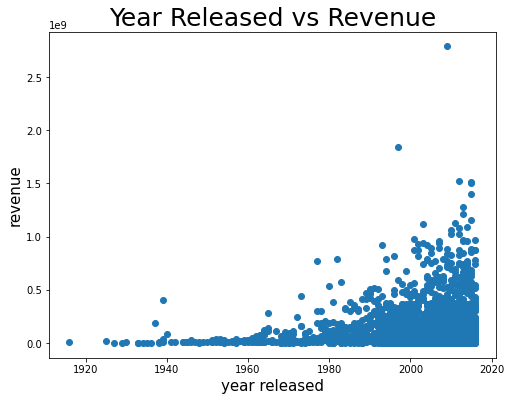

In [ ]:
import matplotlib.pyplot as plt

print(movies_copy['year_released'].min())
print(movies_copy['year_released'].max())
plt.figure(figsize=[8,6])
plt.scatter(movies_copy['year_released'],movies_copy['revenue'])
plt.xlabel('year released', size=15)
plt.ylabel('revenue', size=15)
plt.title('Year Released vs Revenue', size=25)
plt.show()

Movies released in later years had a higher revenue.

In [ ]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2847 entries, 1 to 4321
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  2847 non-null   int64  
 1   genres                  2847 non-null   object 
 2   homepage                1198 non-null   object 
 3   id                      2847 non-null   int64  
 4   keywords                2847 non-null   object 
 5   original_language       2847 non-null   object 
 6   original_title          2847 non-null   object 
 7   overview                2847 non-null   object 
 8   popularity              2847 non-null   float64
 9   production_companies    2847 non-null   object 
 10  production_countries    2847 non-null   object 
 11  release_date            2847 non-null   object 
 12  runtime                 2847 non-null   float64
 13  spoken_languages        2847 non-null   object 
 14  status                  2847 non-null   

## Exploratory Data Analysis

### Genres

In [ ]:
genres_processed_ranks

{'Action': 1013,
 'Adventure': 716,
 'Animation': 210,
 'Comedy': 1567,
 'Crime': 606,
 'Documentary': 100,
 'Drama': 2061,
 'Family': 465,
 'Fantasy': 381,
 'Foreign': 29,
 'History': 180,
 'Horror': 472,
 'Music': 166,
 'Mystery': 315,
 'Romance': 811,
 'Science Fiction': 484,
 'TV Movie': 7,
 'Thriller': 1137,
 'War': 132,
 'Western': 66}

No handles with labels found to put in legend.


0


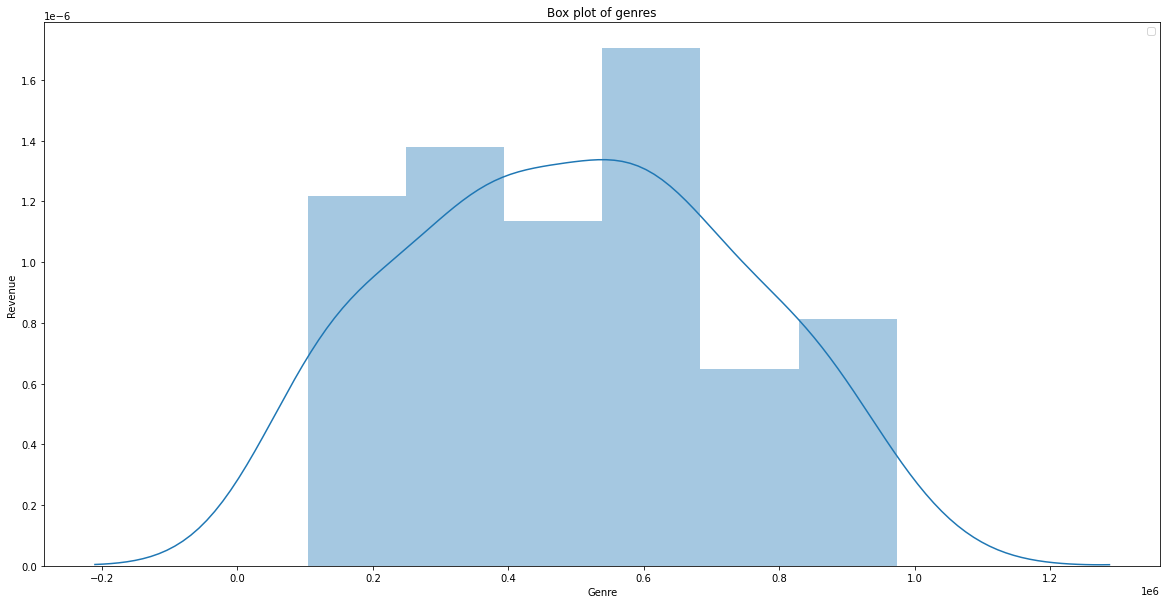

In [ ]:
revenue_df =movies_copy[['genres_processed_ranks', 'revenue']].sort_values('revenue')
print(len(revenue_df[revenue_df.revenue<2e4]))
revenue_boxplot = revenue_df[['revenue']][revenue_df.revenue<1e6]
plt.figure(figsize=(20,10))
sns.distplot(revenue_boxplot)
plt.xlabel('Genre')
#fig,ax=plt.subplots()
#ax.axis([1,100,500,1000,1500,2000,2500])
plt.ylabel('Revenue')
plt.title('Box plot of genres')
plt.legend()
plt.show()

this plot shows revenue logged 

### Revenue, Budget, Popularity

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Popularity of the Movie')

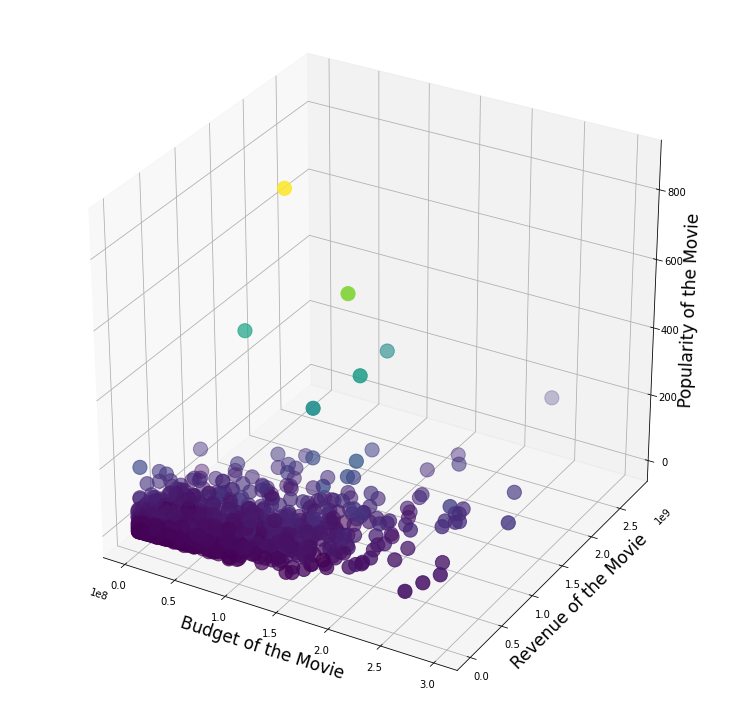

In [ ]:
release_year_mean_data=movies_copy.groupby(['year_released'])['budget','popularity','revenue'].mean()
release_year_mean_data.head()
fig = plt.figure(figsize=(13,13))
ax = plt.subplot(111,projection = '3d')
# Data for three-dimensional scattered points
zdata =movies_copy.popularity
xdata =movies_copy.budget
ydata = movies_copy.revenue
ax.scatter3D(xdata, ydata, zdata, c=zdata, s = 200)
ax.set_xlabel('Budget of the Movie',fontsize=17)
ax.set_ylabel('Revenue of the Movie',fontsize=17)
ax.set_zlabel('Popularity of the Movie',fontsize=17)

The popularity and budget of the movie increases revenue.

In [ ]:
movies_copy.sort_values(by= 'genres_processed_ranks', ascending= False).head(20)[['revenue']]

,revenue
2144,3011195
2352,609016565
2376,93617009
2375,56714147
2373,47536959
2371,266465037
2370,19839492
2369,21284514
2367,5731103
2360,10539000


In [ ]:
corr_matrix = movies_copy.corr()
print(corr_matrix['genres_processed_ranks'].sort_values(ascending=False))

genres_processed_ranks    1.000000
runtime                   0.205584
vote_average              0.166917
cast_ranks                0.089052
year_released             0.012746
movie_id                  0.010059
id                        0.010059
director_ranks           -0.009255
prod_companies_ranks     -0.033483
popularity               -0.106045
vote_count               -0.141028
revenue                  -0.181838
budget                   -0.205477
Name: genres_processed_ranks, dtype: float64


In [ ]:
genres_processed_ranks

{'Action': 1013,
 'Adventure': 716,
 'Animation': 210,
 'Comedy': 1567,
 'Crime': 606,
 'Documentary': 100,
 'Drama': 2061,
 'Family': 465,
 'Fantasy': 381,
 'Foreign': 29,
 'History': 180,
 'Horror': 472,
 'Music': 166,
 'Mystery': 315,
 'Romance': 811,
 'Science Fiction': 484,
 'TV Movie': 7,
 'Thriller': 1137,
 'War': 132,
 'Western': 66}

Popularity distribution among films

No handles with labels found to put in legend.


430


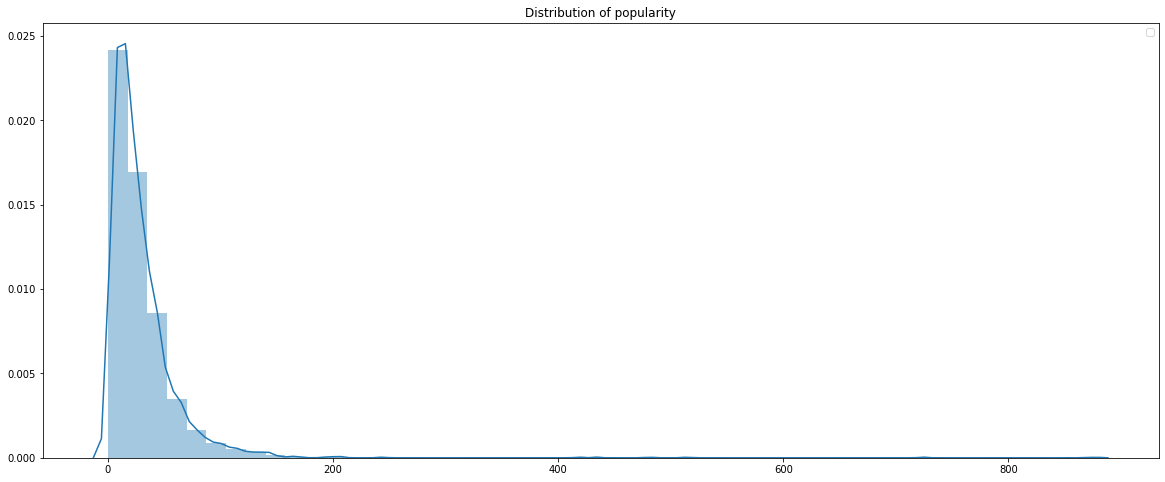

In [ ]:
popularity_df = movies_copy[['title', 'popularity']].sort_values('popularity')
print(len(popularity_df[popularity_df.popularity<7]))
popularity_boxplot = popularity_df[['popularity']]
plt.figure(figsize=(20,8))
sns.distplot(popularity_boxplot)
plt.title('Distribution of popularity')
plt.legend()
plt.show()

Almost half of the movies within the dataset do not have a low popularity ranking below 7, while others have a value around 200

### Profit

Find the most profitable movies by subtracting budget from revenue.

In [ ]:
movies_copy['profit'] = movies_copy['revenue'] - movies_copy['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres_processed',
         'popularity',
         'production_countries',
        'release_date',
         'spoken_languages',
         'title',
        'cast',
         'vote_average',
         'vote_count']
#movies_copy = movies_copy[cols]
movies_copy.sort_values(by = ['budget'], ascending=False).head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,title.1,cast,crew,revenue,genres_processed,genres_processed_ranks,prod_companies_ranks,cast_ranks,director_ranks,year_released,profit
2558,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",961000000,Adventure|Fantasy|Action,1013,84,74,4,2007,661000000
1572,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",1405403694,Action|Adventure|ScienceFiction,1013,13,92,3,2015,1125403694
3392,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400,1452,Superman Returns,"[{""cast_id"": 3, ""character"": ""Superman / Clark...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de...",391081192,Adventure|Fantasy|Action|ScienceFiction,1013,249,58,8,2006,121081192
1068,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...",591794936,Animation|Family,465,84,47,2,2010,331794936
3995,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",284139100,Action|Adventure|ScienceFiction,1013,84,63,4,2012,241

In [ ]:
profit_data.head()

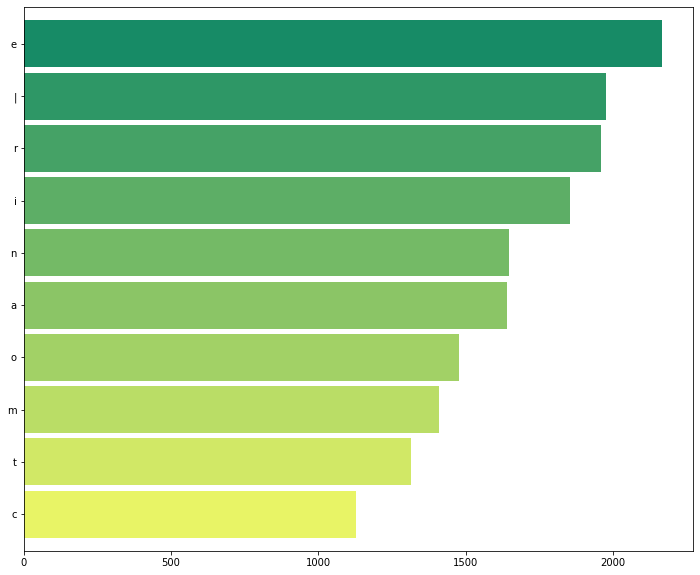

In [ ]:
plt.subplots(figsize=(12,10))
list1=[]

# extending the list of genres to collect all the genres of all the profitable movies
for i in profit_data['genres_processed']:
    list1.extend(i)

    
genre_count_series = pd.Series(list1).value_counts()[:10].sort_values(ascending=True)


ax = genre_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

ax

The above plot shows movie genres arranged according to the profit with Comedy movies ranked as the most profitable.

### Cast

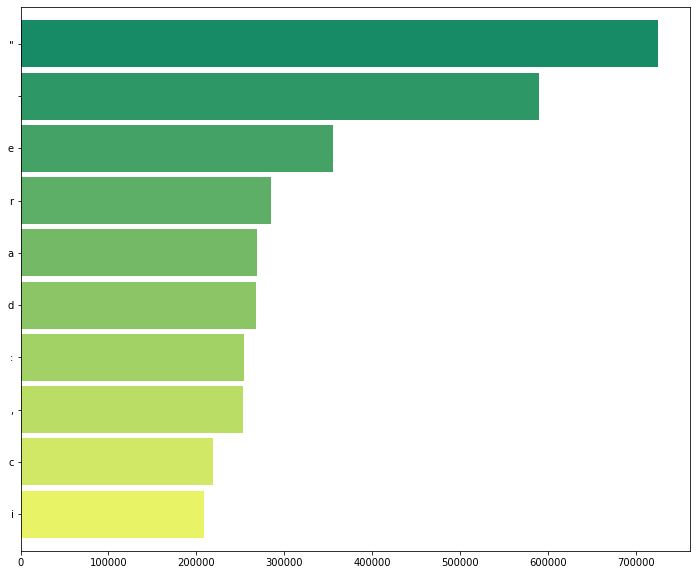

In [ ]:
plt.subplots(figsize=(12,10))
list1=[]

# extending the list of genres to collect all the genres of all the profitable movies
for i in profit_data['cast']:
    list1.extend(i)

    
cast_count_series = pd.Series(list1).value_counts()[:10].sort_values(ascending=True)


ax = cast_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

ax

The above plot shows most frequent cast among the profitable movies.

### Correlation

In [ ]:
movies_copy_1= movies_copy.drop(columns=['keywords', 'original_language', 'original_title', 'genres_processed',
       'production_companies', 'production_countries', 'homepage', 'genres', 'tagline', 'overview', 
        'spoken_languages', 'status', 'movie_id', 'title.1', 'cast', 'crew', 'id', 
       'year_released', 'release_date', 'title', 'vote_count', 'vote_average', 'popularity'])

Build a correlation matrix to identify relevant features that influence profit.

In [ ]:
corr_matrix = movies_copy_1.corr()
print(corr_matrix['profit'].sort_values(ascending=False))

profit                    1.000000
revenue                   0.980368
budget                    0.536208
cast_ranks                0.233863
runtime                   0.203717
director_ranks            0.198135
prod_companies_ranks      0.170830
genres_processed_ranks   -0.156516
Name: profit, dtype: float64


Create a heatmap to show the correlation network of all the variables

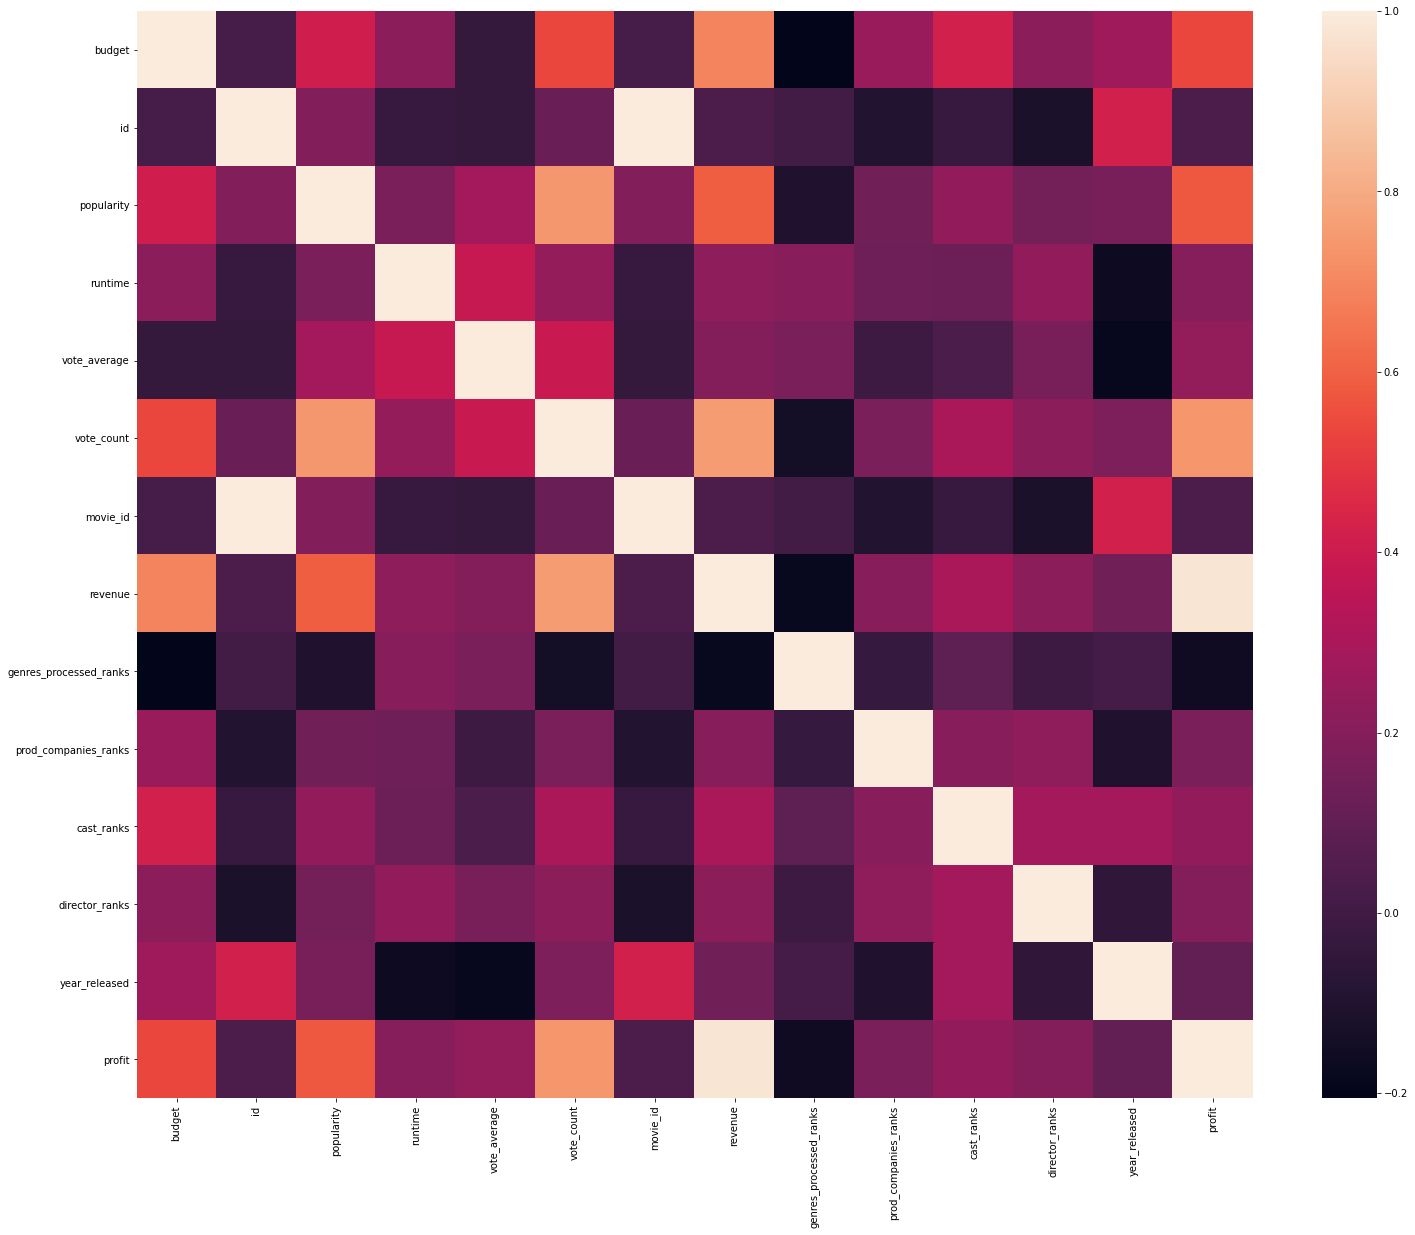

In [ ]:
f, ax = plt.subplots(figsize=(25,20))
corr= movies_copy.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Visualization & Communication of Results

#### Decision Tree

Drop columns informed by Data Cleaning and EDA to create a model for the Decision Tree.

In [ ]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2847 entries, 1 to 4321
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  2847 non-null   int64  
 1   genres                  2847 non-null   object 
 2   homepage                1198 non-null   object 
 3   id                      2847 non-null   int64  
 4   keywords                2847 non-null   object 
 5   original_language       2847 non-null   object 
 6   original_title          2847 non-null   object 
 7   overview                2847 non-null   object 
 8   popularity              2847 non-null   float64
 9   production_companies    2847 non-null   object 
 10  production_countries    2847 non-null   object 
 11  release_date            2847 non-null   object 
 12  runtime                 2847 non-null   float64
 13  spoken_languages        2847 non-null   object 
 14  status                  2847 non-null   

In [ ]:
model = movies_copy.drop(columns=['keywords', 'original_language', 'original_title', 'genres_processed',
       'production_companies', 'production_countries', 'homepage', 'genres', 'tagline', 'overview', 'budget',
        'spoken_languages', 'status', 'movie_id', 'title.1', 'cast', 'crew', 'revenue', 'id', 'profit',
       'year_released', 'release_date', 'title', 'vote_count', 'vote_average', 'popularity'])

In [ ]:
target = movies_copy['revenue']

In [ ]:
X= model
y= target

In [ ]:
numLoops =25

mean_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)

mean_error.mean()

2.49550475311047e+16

In [ ]:
model_all = DecisionTreeRegressor(max_depth=3, random_state=0)
model_all.fit(X,y)
y_pred_all = model_all.predict(X)

mean_error = mean_squared_error(y, y_pred_all)
mean_error

2.4114474961875396e+16

Visualize the Decision Tree

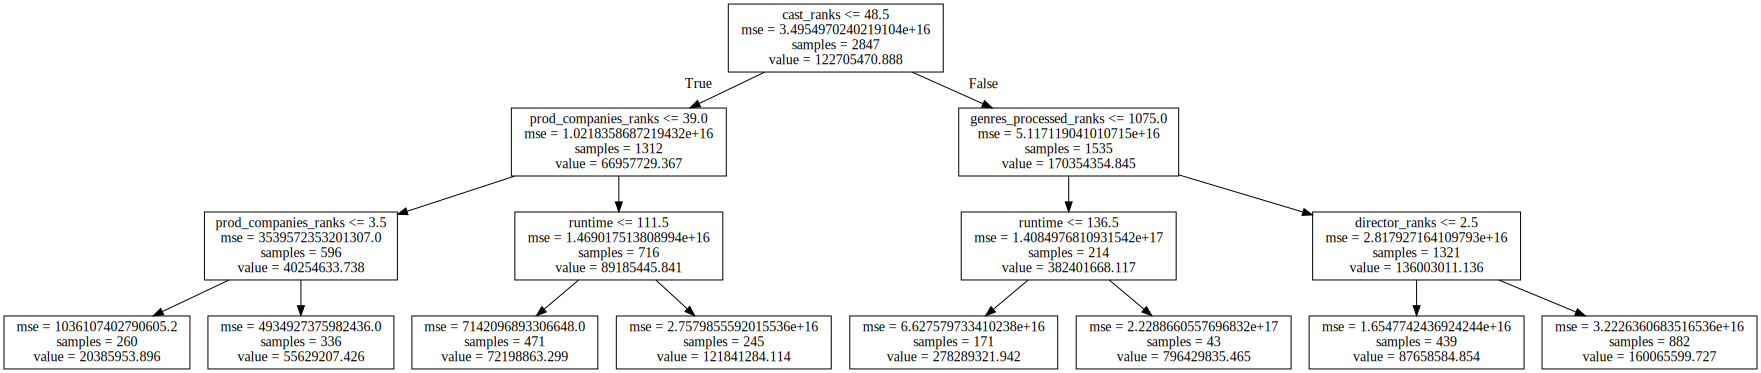

True

In [ ]:
import graphviz
import pydotplus

from IPython.display import display
from sklearn import tree
display(graphviz.Source(tree.export_graphviz(model_all, feature_names= X.columns)))

dot_data = tree.export_graphviz(model_all, feature_names= X.columns)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"5,5!"')
pydot_graph.write_png('resized_tree.png')

Key features shown through the decision points in the visualization include: Cast Ranks, Production Company Ranks, Genre Ranks, Director Ranks, and Runtime

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

numTrees = 40

mse_all = np.zeros(numTrees)

for outIdx in range(0,numTrees):

  numLoops   = 25
  mse_inside = np.zeros(numLoops)

  for inIdx in range(0,numLoops):

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
    rfModel = RandomForestRegressor(n_estimators=(outIdx+1), random_state=0)
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    mse_inside[inIdx] = mean_squared_error(y_test, y_pred_rf)

  print(outIdx,' trees finished.')
  mse_all[outIdx] = mse_inside.mean()

  plt.plot(mse_all)

After around 33 trees, the predictive power tapers off for the model.

### XGBoost

In [ ]:
import xgboost as xgb

numLoops = 1000
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  if (idx % 50 == 0): print(idx)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)
  xgbr = xgb.XGBRegressor(verbosity=0)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

mse_xgb.mean()

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


3.01315166897145e+16

In [ ]:
print(xgbr)

In [ ]:
xgbr.feature_importances_

In [ ]:
feat_imp = pd.Series(xgbr.feature_importances_, index= X.columns)
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score');

The XG Boost lists the following features in order of importance: Genre, Runtime, Cast Rank, Director Ranks, Production Company Rank

## Conclusion

In conclusion, the movie features of importance to the box office success of a film as indicated by the Decision Tree and XG Boost include: Genre, Runtime, Cast Rank, Director Rank, and Production Company Rank. For future analysis, I will consider using natural language processing to evaluate the text data provided by the IMDB dataset to analyze how the plot and sentiment of films informs box office success. Engaging with domain experts in the film industry will also be a key addition to the analysis to gain further insights into features to consider for box office success and identify supplemental data sources beyond IMDB. 